In [52]:
#! /usr/bin/env python

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

In [53]:
class mosaic:
    def __init__(self,file):
        im = Image.open(file) # Lê a imagem de entrada
        self.width, self.height = im.size
        self.original = self.image = np.array(im, dtype="uint8") #  Converte a imagem como array numpy

    def interpolation(self, K):
        output = np.zeros((int(self.width*K), int(self.height*K)), "uint8")
        for i in range(0,K*(self.width-1),K):
            for j in range(0,K*(self.height-1),K):
                for i_add in range(K):
                    for j_add in range(K):
                        output[i+i_add][j+j_add] = self.image[int(i/K)][int(j/K)]
        self.image = output
        self.out = Image.fromarray(output, 'L') # Converte o array pra imagem, declarando que a imagem deve estar em tons de cinza
        self.width, self.height = self.out.size

    def downsampling(self, K):
        output = np.zeros((int(self.width/K), int(self.height/K)), "uint8")
        for i in range(0,self.width, K):
            for j in range(0, self.height, K):
                output[int(i/K)][int(j/K)] = self.image[i][j]
        self.image = output
        self.out = Image.fromarray(output, 'L') # Converte o array pra imagem, declarando que a imagem deve estar em tons de cinza
        self.width, self.height = self.out.size

    def granulate(self, K):
        output = np.zeros((self.width, self.height), "uint8")
        for i in range(0,self.width-K,K):
            for j in range(0,self.height-K,K):
                for i_add in range(K):
                    for j_add in range(K):
                        output[i+i_add][j+j_add] = self.image[i][j]
        self.image = output
        self.out = Image.fromarray(output, 'L') # Converte o array pra imagem, declarando que a imagem deve estar em tons de cinza
        self.width, self.height = self.out.size

### Conversão para escala de cinza

In [60]:
rgb = Image.open('lena.png')

gs = rgb.convert(mode='L')

In [64]:
gs.save('lena_gs.png')

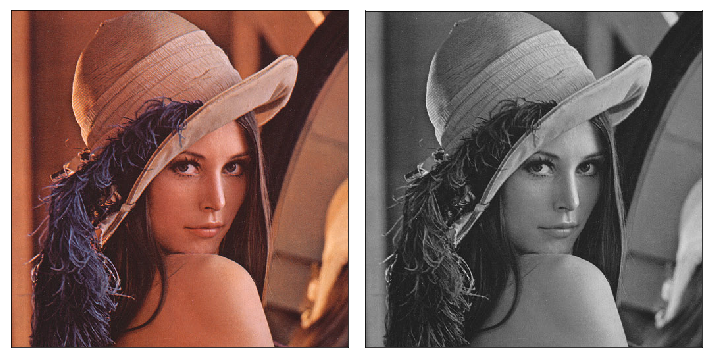

In [83]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(121)
plt.xticks([])
plt.yticks([])
ax1.imshow(rgb)


ax2 = fig.add_subplot(122)
plt.xticks([])
plt.yticks([])
ax2.imshow(gs.convert('RGBA'))

plt.tight_layout()

plt.show()

In [101]:
lena = mosaic('lena_gs.png')

In [102]:
lena.granulate(16)

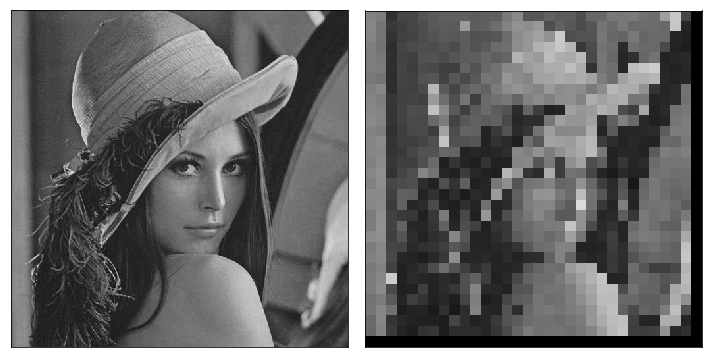

In [103]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(121)
plt.xticks([])
plt.yticks([])
ax1.imshow(gs.convert('RGBA'))


ax2 = fig.add_subplot(122)
plt.xticks([])
plt.yticks([])
ax2.imshow(lena.out.convert('RGBA'))

plt.tight_layout()

plt.show()

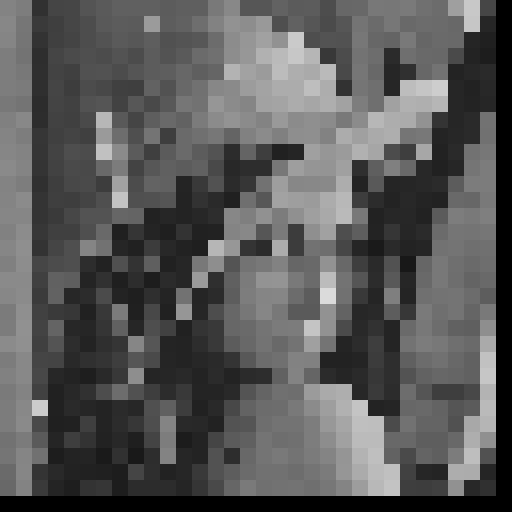

In [104]:
lena.out